In [1]:
import numpy as np

np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)


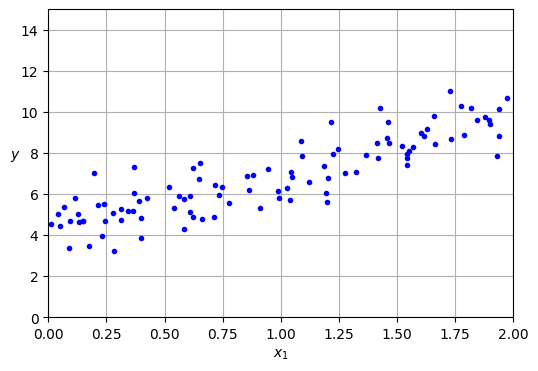

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid();

In [3]:
matrix_a=np.array([[1,2], [3,4]])
matrix_b=np.array([[5,6], [7,8]])

result=matrix_a @ matrix_b
result1= np.dot(matrix_a,matrix_b)

print("Matrix A:")
print(matrix_a)
print("\nMatrix B:")
print(matrix_b)
print("\nResult of Matrix Multiplication (A @ B):")
print(result)
print("Result of Dot product:")
print(result1)
print('Element wise Multiplication')
print(matrix_a * matrix_b)


Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

Result of Matrix Multiplication (A @ B):
[[19 22]
 [43 50]]
Result of Dot product:
[[19 22]
 [43 50]]
Element wise Multiplication
[[ 5 12]
 [21 32]]


In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b=add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @X_b.T @y

In [5]:

X_new = np.array ( [[0] , [2] ])
X_new_b= add_dummy_feature(X_new)
y_predict=X_new_b@ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

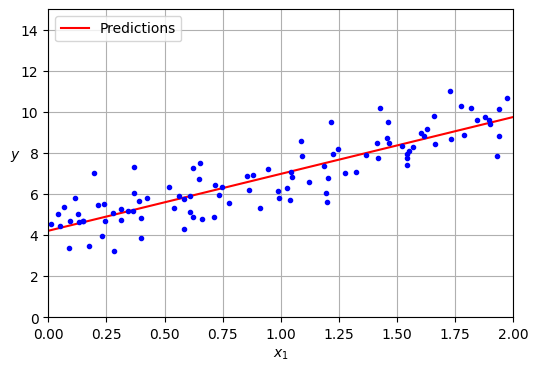

In [6]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict,"r-",label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Gradient Descent

In [9]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 1 / m * 2 * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

# Stochastic Gradient Descent

In [11]:
np.random.seed(42)
eta=0.1
m=len(X_b)
theta=np.random.randn(2,1)
for epoch in range (n_epochs):
  for iteration in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index : random_index +1]
    yi=y[random_index : random_index +1]
    gradients = 2*xi.T@(xi@theta-yi)
    theta=theta-eta*gradients

In [12]:
X_b[random_index : random_index +1]

array([[1.        , 1.46398788]])

In [13]:
theta

array([[4.17686315],
       [2.85986577]])

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000,tol=0.00001,eta0=0.01,
                     n_iter_no_change=100,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, random_state=42, tol=1e-05)

In [15]:
np.array([[[1,2,3]]]).ravel()

array([1, 2, 3])

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21353251]), array([2.77191196]))

# Mini-batch Gradient Descent

In [17]:
from math import ceil
n_epochs=50
eta=0.1
m=len(X_b)
minibatch_size=20
n_batches_per_epoch=ceil(m/minibatch_size)
np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  shuffled_indices=np.random.permutation(m)
  X_b_shuffled=X_b[shuffled_indices]
  y_shuffled=y[shuffled_indices]
  for iteration in range (0,n_batches_per_epoch):
    idx=iteration * minibatch_size
    xi=X_b_shuffled[idx:idx+minibatch_size]
    yi=y_shuffled[idx:idx+minibatch_size]
    gradients=2/minibatch_size*xi.T@ (xi @ theta-yi)
    theta=theta-eta*gradients

# Polynomial Regression

In [18]:
#  w*x+b

In [19]:
np.random.seed(42)
m=100
X=6* np.random.rand(m,1)-3
y=0.5*X**2 +X+2+np.random.randn(m,1)

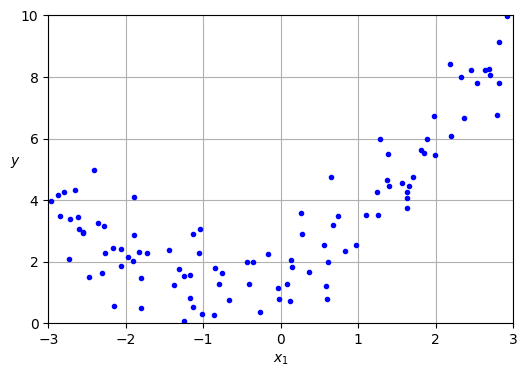

In [20]:
plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

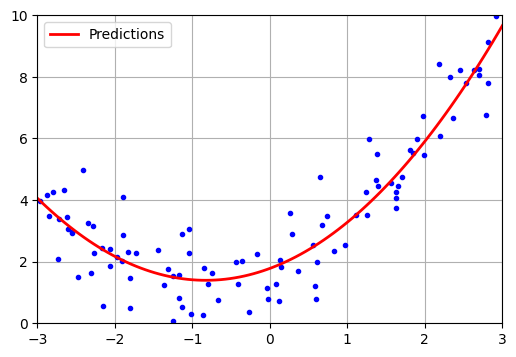

In [23]:

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()


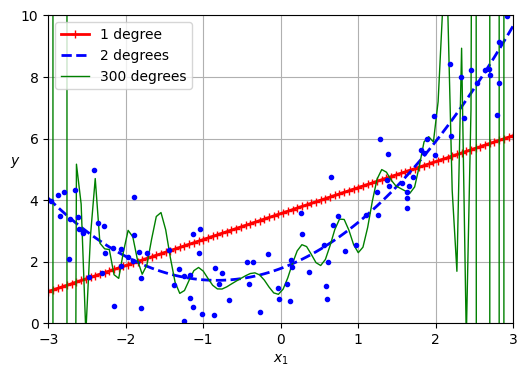

In [24]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()


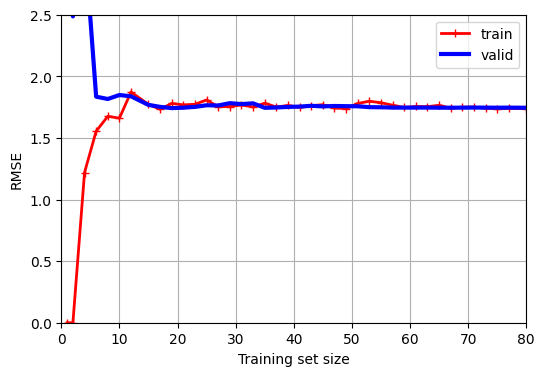

In [25]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,valid_scores=learning_curve(
  LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,
  scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])


plt.show()


In [26]:
from sklearn.pipeline import make_pipeline

polynomial_regression=make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())
train_sizes,train_scores,valid_scores=learning_curve(
    polynomial_regression,X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring="neg_root_mean_squared_error")

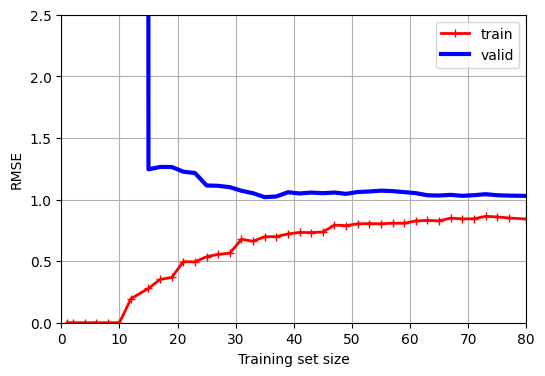

In [27]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])


plt.show()

# Ridge Regression

In [28]:
np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new=np.linspace(0,3,100).reshape(100,1)

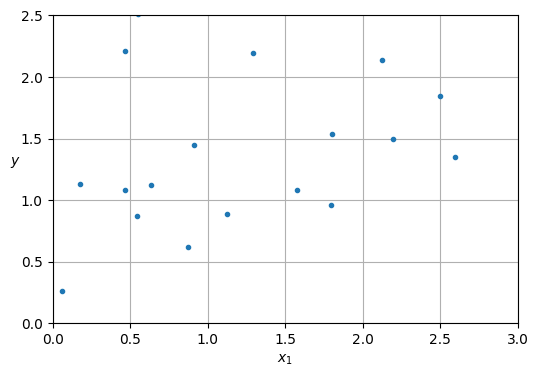

In [29]:
plt.figure (figsize=(6,4))
plt.plot(X,y,"." )
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,3,0,2.5])
plt.grid()
plt.show()



In [30]:
from sklearn.linear_model import Ridge #l2

ridge_reg =Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([1.55325833])

In [31]:
sgd_reg=SGDRegressor(penalty="l2",
                     max_iter=1000,eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

# Lasso Regression

In [32]:
from sklearn.linear_model import Lasso #l1

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

# Elastic Net

In [33]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [34]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [35]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [36]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [37]:
iris.target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [38]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [39]:
iris.data["petal width (cm)"].values

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=iris.data["petal width (cm)"].values
y=iris.target_names[iris.target]=='virginica'
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42)

log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train.reshape(-1,1),y_train)

LogisticRegression(random_state=42)

In [41]:
log_reg.score(X_test.reshape(-1,1),y_test)


1.0

In [42]:
log_reg.score(X_test.reshape(-1,1),y_test)

1.0

In [43]:
#1. Which linear regression training algorithm can you use if you have a training set with millions of features?
# Linear regression algoritims


In [44]:
# 2.Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?
# If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl,
# so the Gradient Descent algorithms will take a long time to converge. To solve this you should scale the data before training the model.
# Note that the Normal Equation will work just fine without scaling.



In [45]:
#3.Can gradient descent get stuck in a local minimum when training a logistic regression model?
# Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex
# (If you draw a straight line between any two points on the curve, the line never crosses the curve.)


In [46]:
# 4.Do all gradient descent algorithms lead to the same model, provided you let them run long enough?
# If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high,
# then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless you gradually
# reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum.
#  This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.
